In [ ]:
DATA ANALYSIS OF GOOGLE APP'S RATINGS

In [5]:
#Import the required modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
Read Data

In [6]:
data_url = 'https://raw.githubusercontent.com/DivyaThakur24/GoogleAppRating-DataAnalysis/master/googleplaystore.csv'
google_data = pd.read_csv(data_url)


In [7]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
google_data.shape


(10841, 13)

In [9]:
google_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


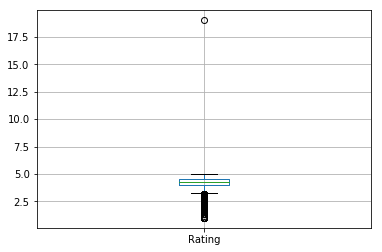

In [10]:
google_data.boxplot()

In [11]:
google_data.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
google_data[google_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
google_data.drop( [10472] , inplace = True)

In [18]:
threshold = len(google_data)*0.1

In [19]:
google_data.dropna(thresh = threshold, axis = 1, inplace = True)

###### Data imputation and Manipulation

In [23]:
def impute_median(series):
    return series.fillna(series.median())


In [24]:
google_data.Rating = google_data['Rating'].transform(impute_median)

In [25]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [27]:
print(google_data['Android Ver'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Type'].mode())

0    4.1 and up
dtype: object
0    Varies with device
dtype: object
0    Free
dtype: object


In [28]:
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]), inplace = True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]), inplace = True)
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]), inplace = True)

In [29]:
google_data.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [31]:
google_data['Price'] = google_data['Price'].apply(lambda x: str(x).replace('$' , '') if '$' in str(x) else str(x))
google_data['Price'] = google_data['Price'].apply(lambda x: float(x))
google_data['Reviews'] = pd.to_numeric(google_data['Reviews'] , errors = 'coerce')

In [32]:
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace('+' , '') if '+' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(',' , '') if ',' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: float(x))

In [33]:
google_data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


##### group by function DATA VISualization

In [34]:
grp = google_data.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Reviews'].agg(np.sum)
z = grp['Price'].agg(np.mean)

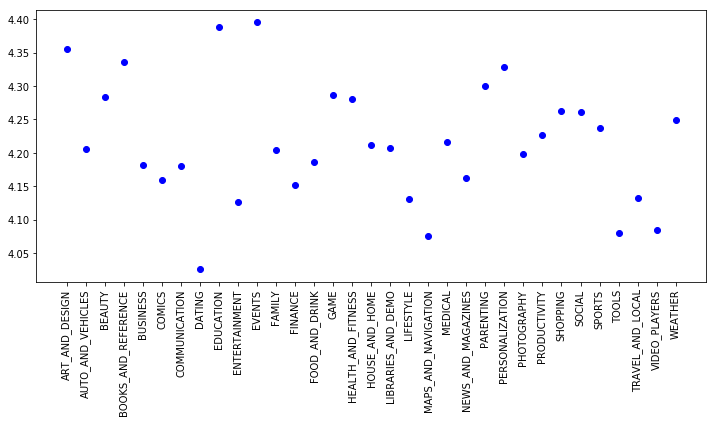

In [37]:
plt.figure(figsize=(12,5))
plt.plot(x, 'ro', color = 'b')
plt.xticks(rotation= 90)
plt.show()

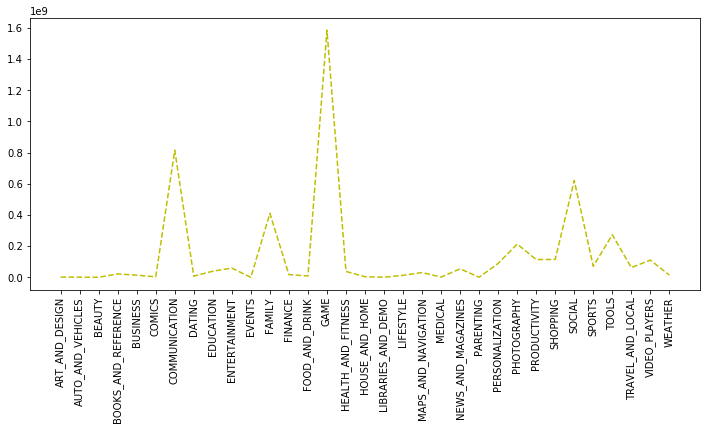

In [38]:
plt.figure(figsize=(12,5))
plt.plot(y, 'r--', color = 'y')
plt.xticks(rotation= 90)
plt.show()

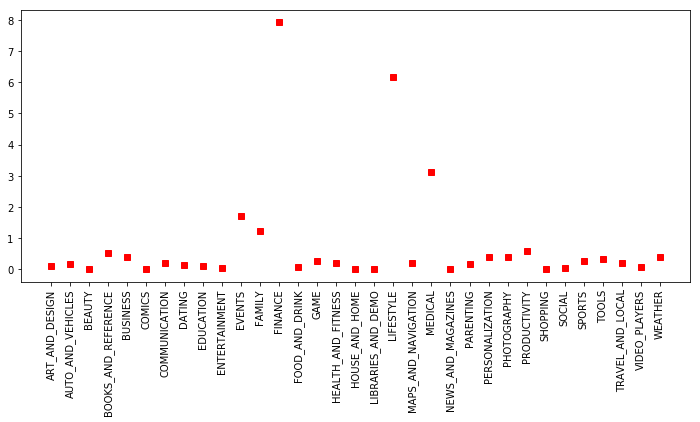

In [40]:
plt.figure(figsize=(12,5))
plt.plot(z, 'bs', color = 'r')
plt.xticks(rotation= 90)
plt.show()